In [30]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

random.seed(47)

In [3]:
# load data
combats = pd.read_csv('./Python/Data/combats.csv')
pokemons = pd.read_csv('./Python/Data/pokemon.csv')
tests = pd.read_csv('./Python/Data/tests.csv')

In [4]:
pokemons.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [6]:
print("hp range: %i - %i" % (pokemons.HP.min(), pokemons.HP.max()))
print("attack range: %i - %i" % (pokemons.Attack.min(), pokemons.Attack.max()))
print("defence range: %i - %i" % (pokemons.Defense.min(), pokemons.Defense.max()))

hp range: 1 - 255
attack range: 5 - 190
defence range: 5 - 230


In [7]:
# put range in vars
Hp = [pokemons.HP.min(), pokemons.HP.max()]
Atk = [pokemons.Attack.min(), pokemons.Attack.max()]
Def = [pokemons.Defense.min(), pokemons.Defense.max()]

In [8]:
pokemons['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [9]:
pokemons['Type 2'].unique().size

19

In [173]:
testdata = pokemons.loc[25:75,['HP','Attack','Defense','Name']]

In [138]:
testdata.values

array([[40, 45, 40, 'Pidgey'],
       [63, 60, 55, 'Pidgeotto'],
       [83, 80, 75, 'Pidgeot'],
       [83, 80, 80, 'Mega Pidgeot'],
       [30, 56, 35, 'Rattata'],
       [55, 81, 60, 'Raticate'],
       [40, 60, 30, 'Spearow'],
       [65, 90, 65, 'Fearow'],
       [35, 60, 44, 'Ekans'],
       [60, 85, 69, 'Arbok'],
       [35, 55, 40, 'Pikachu'],
       [60, 90, 55, 'Raichu'],
       [50, 75, 85, 'Sandshrew'],
       [75, 100, 110, 'Sandslash'],
       [55, 47, 52, 'Nidoran♀'],
       [70, 62, 67, 'Nidorina'],
       [90, 92, 87, 'Nidoqueen'],
       [46, 57, 40, 'Nidoran♂'],
       [61, 72, 57, 'Nidorino'],
       [81, 102, 77, 'Nidoking'],
       [70, 45, 48, 'Clefairy'],
       [95, 70, 73, 'Clefable'],
       [38, 41, 40, 'Vulpix'],
       [73, 76, 75, 'Ninetales'],
       [115, 45, 20, 'Jigglypuff'],
       [140, 70, 45, 'Wigglytuff'],
       [40, 45, 35, 'Zubat'],
       [75, 80, 70, 'Golbat'],
       [45, 50, 55, 'Oddish'],
       [60, 65, 70, 'Gloom'],
       [75, 80, 85, 

### Steps to take
1) Set amount of K clusters  
2) Assign each data point to closest centroid  
3) Recompute the cluster centroids(mean of all data points in cluster)  
4) back to step 2 and repeat

In [166]:
def KMeans(points, k = 3, max_iter = 10):
    # generate k random centroids
    #centroids = centroid_gen(k)
    centroids = {0: [40, 30, 30], 1: [70,  80,  70], 2 : [90,  100,  90]}
    centroids = dict(centroids)

    cluster = {}
    
    iteration = 0
    while iteration < max_iter:
        print("\ncentroids: "+ str(centroids))
        print('Iteration: ' + str(iteration))
        for i in range(0,len(points)):
            distances = calc_dist(centroids, points[i])
            min_dist_key = min(distances, key=distances.get)
            cluster[i] = {'centroid': min_dist_key, 'distance': distances[min_dist_key], 'pokemon': points[i][3], 'centroid_arr': centroids[min_dist_key], 'hp': str(points[i][0]),"atk": str(points[i][1]), "def":str(points[i][2])}
            print('Cluster: %s , distance: %s' % (cluster[i]['centroid'], cluster[i]['distance']))
        iteration += 1
        
        # Generate list of data points + corresponding centroid
        new_centroids = {}
        t = [] 
        for i in range(k):
            for j in range(len(points)):
                if i == cluster[j]['centroid']:
                    t.append([points[j][0], points[j][1], points[j][2], points[j][3], cluster[j]['centroid'] ]) #HP, ATK, DEF, Name, Cluster
            
            cmean = []
            for pok in t:
                if pok[4] == i:
                    cmean.append(pok[0:3])
            new_centroids[i] = np.mean(cmean, axis=0)
        centroids = new_centroids         
        
        print(t)
    print('------------------- \n')
        
    return cluster

In [151]:
# generate k random centroids
def centroid_gen(k):
    centroids = {}
    for c in range(0,k):
        rand_hp = random.randint(Hp[0],Hp[1])
        rand_atk = random.randint(Atk[0],Atk[1])
        rand_def = random.randint(Def[0],Def[1])
        centroids[c] = np.array([rand_hp, rand_atk, rand_def])
    return centroids

In [152]:
# calculate Euclidean distance
def calc_dist(cen, p):
    distances = {}
    for k in cen:
        Sum = (cen[k][0]-p[0])**2 + (cen[k][1]-p[1])**2 + (cen[k][2]-p[2])**2
        distance = math.sqrt(Sum)
        distances[k] = distance
    return distances

In [174]:
# paramters: Data, Clusters, Iterations
kpokemon = KMeans(testdata.values ,3 , 40)


centroids: {0: [40, 30, 30], 1: [70, 80, 70], 2: [90, 100, 90]}
Iteration: 0
Cluster: 1 , distance: 18.05547008526779
Cluster: 0 , distance: 30.0
Cluster: 1 , distance: 12.24744871391589
Cluster: 0 , distance: 33.481338085566414
Cluster: 1 , distance: 11.224972160321824
Cluster: 0 , distance: 27.386127875258307
Cluster: 1 , distance: 20.615528128088304
Cluster: 1 , distance: 25.495097567963924
Cluster: 2 , distance: 25.0
Cluster: 0 , distance: 31.591137997862628
Cluster: 1 , distance: 18.24828759089466
Cluster: 2 , distance: 8.54400374531753
Cluster: 0 , distance: 29.410882339705484
Cluster: 1 , distance: 17.72004514666935
Cluster: 2 , distance: 15.937377450509228
Cluster: 0 , distance: 38.06573262134856
Cluster: 1 , distance: 27.09243436828813
Cluster: 0 , distance: 15.0
Cluster: 1 , distance: 7.0710678118654755
Cluster: 1 , distance: 75.82875444051551
Cluster: 2 , distance: 73.65459931328118
Cluster: 0 , distance: 15.811388300841896
Cluster: 1 , distance: 5.0
Cluster: 0 , distance: 

Cluster: 1 , distance: 13.644273706802784
Cluster: 0 , distance: 7.227122007895453
Cluster: 1 , distance: 17.699476493502416
Cluster: 1 , distance: 27.869203805914935
Cluster: 2 , distance: 33.96424955646575
Cluster: 0 , distance: 18.630309588789704
Cluster: 1 , distance: 14.378635274412188
Cluster: 2 , distance: 7.219120616760663
Cluster: 0 , distance: 5.144840887248318
Cluster: 1 , distance: 7.430937798494681
Cluster: 2 , distance: 12.329833469614654
Cluster: 0 , distance: 30.208684609733343
Cluster: 2 , distance: 25.31308092895258
Cluster: 0 , distance: 13.316400812991656
Cluster: 1 , distance: 14.940509916502076
Cluster: 1 , distance: 71.26199174976828
Cluster: 2 , distance: 65.76077355721247
Cluster: 0 , distance: 10.389686146909948
Cluster: 1 , distance: 13.302468893794115
Cluster: 0 , distance: 15.394583374645494
Cluster: 1 , distance: 13.883268792131434
Cluster: 2 , distance: 20.679969947386134
Cluster: 0 , distance: 23.070138545682962
Cluster: 1 , distance: 27.665442908110823


In [41]:
kpokemon

{0: {'centroid': 0,
  'distance': 17.5863938884582,
  'pokemon': 'Ivysaur',
  'centroid_arr': array([51.875, 48.   , 56.125]),
  'hp': '60',
  'atk': '62',
  'def': '63'},
 1: {'centroid': 1,
  'distance': 22.656260116113152,
  'pokemon': 'Venusaur',
  'centroid_arr': array([78.85714286, 98.        , 99.        ]),
  'hp': '80',
  'atk': '82',
  'def': '83'},
 2: {'centroid': 1,
  'distance': 24.11029079975975,
  'pokemon': 'Mega Venusaur',
  'centroid_arr': array([78.85714286, 98.        , 99.        ]),
  'hp': '80',
  'atk': '100',
  'def': '123'},
 3: {'centroid': 0,
  'distance': 18.8157181632804,
  'pokemon': 'Charmander',
  'centroid_arr': array([51.875, 48.   , 56.125]),
  'hp': '39',
  'atk': '52',
  'def': '43'},
 4: {'centroid': 0,
  'distance': 17.234594570224157,
  'pokemon': 'Charmeleon',
  'centroid_arr': array([51.875, 48.   , 56.125]),
  'hp': '58',
  'atk': '64',
  'def': '58'},
 5: {'centroid': 1,
  'distance': 25.25340954955491,
  'pokemon': 'Charizard',
  'centroid

In [175]:
# cens = {} #centroid
# x = [] #atk
# y = [] #def
# z = [] #hp

for cen in range(3):
    cens[cen] = {}
    cens[cen]['x'] = []
    cens[cen]['y'] = []
    cens[cen]['z'] = []
    for p in kpokemon:
        if kpokemon[p]['centroid'] == cen:
            cens[cen]['x'].append(float(kpokemon[p]["atk"]))
            cens[cen]['y'].append(float(kpokemon[p]["def"]))
            cens[cen]['z'].append(float(kpokemon[p]["hp"]))

In [148]:
cens

{0: {'x': [30.0,
   20.0,
   45.0,
   35.0,
   25.0,
   45.0,
   60.0,
   56.0,
   60.0,
   60.0,
   55.0,
   47.0,
   57.0,
   45.0,
   41.0,
   45.0,
   45.0,
   50.0],
  'y': [35.0,
   55.0,
   50.0,
   30.0,
   50.0,
   40.0,
   55.0,
   35.0,
   30.0,
   44.0,
   40.0,
   52.0,
   40.0,
   48.0,
   40.0,
   20.0,
   35.0,
   55.0],
  'z': [45.0,
   50.0,
   60.0,
   40.0,
   45.0,
   40.0,
   63.0,
   30.0,
   40.0,
   35.0,
   35.0,
   55.0,
   46.0,
   70.0,
   38.0,
   115.0,
   40.0,
   45.0]},
 1: {'x': [63.0,
   83.0,
   103.0,
   90.0,
   150.0,
   80.0,
   80.0,
   81.0,
   90.0,
   85.0,
   90.0,
   75.0,
   100.0,
   62.0,
   92.0,
   72.0,
   102.0,
   70.0,
   76.0,
   70.0,
   80.0,
   65.0,
   80.0],
  'y': [80.0,
   100.0,
   120.0,
   40.0,
   40.0,
   75.0,
   80.0,
   60.0,
   65.0,
   69.0,
   55.0,
   85.0,
   110.0,
   67.0,
   87.0,
   57.0,
   77.0,
   73.0,
   75.0,
   45.0,
   70.0,
   70.0,
   85.0],
  'z': [59.0,
   79.0,
   79.0,
   65.0,
   65.0,
   83

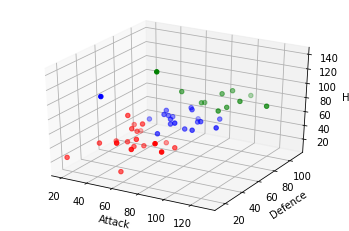

In [176]:
fig = plt.figure()
colors = ['r','b','g']
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
# x =[1,2,3,4,5,6,7,8,9,10]
# y =[5,6,2,3,13,4,1,2,4,8]
# z =[2,3,3,3,5,7,9,11,9,10]
for c in range(len(cens)):
    ax.scatter(cens[c]['x'], cens[c]['y'], cens[c]['z'], c=colors[c], marker='o')

#ax.scatter(x, y, z, c='r', marker='o')
#ax.scatter([60], [60], [60], c='b', marker='o')

ax.set_xlabel('Attack')
ax.set_ylabel('Defence')
ax.set_zlabel('HP')

plt.show()

<br>
<br>
<br>
calculate squared error per k